Goal: Optimization problem solving
- Using the method of Lagrange multipliers
- Using CVXOPT

Quick question up front: would it be helpful to have even simpler problems than those below? I could do problems with either 
- a single quadratic variable ... *and/or*
- a linear programming problem

# Refreshers

I strongly recommend watching [the Three Blue, One Brown series on linear algebra](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=1). It may seem trivial at first, but the explanations build a visual language that's going to be used with higher-level concepts.

### Dot products

What's the dot product of two vectors, $\bm{x}$ and $\bm{y}$? How is this written and how is this expressed?

For any two vectors, both the same size, $N$ (or $\bm{x}. \bm{y} \in \mathbb{R}^N$): 
$$\bm{x} \cdot \bm{y} = \bm{x}^\intercal \bm{y} = \sum_i x_i y_i$$

For a single vector, it's convenient to think about the length of the vector:
$$\bm{x} \cdot \bm{x} = \sum_i x_i x_i = ||\bm{x}||^2_2$$

Where $||\cdot||_2$ is the "two-norm" of a vector, which I think of in reference to the [Euclidean distance formula](https://en.wikipedia.org/wiki/Euclidean_distance):
$$
||\bm{x}||_2 = \sqrt{\sum_i (x_i)^2} 
$$

Or:
$$
||\bm{x}||_2^2 = \sum_i x_i^2 = \sum_i x_i x_i = \bm{x}^\intercal\bm{x}
$$

### Lagrange Multipliers

From [Lecture 4 Slides](https://personal.utdallas.edu/~nicholas.ruozzi/cs4375/2024fa/lects/Lecture_4_LM_and_Kernel.pdf)

One way to solve constrained optimization problems is the method of Lagrange multipliers.

I start from some *primal problem*:
$$
\begin{equation*}
\begin{aligned}
\min_{\theta} \quad & f(\theta) \\
\text{s.t.} \quad  & c_i(\theta) \leq 0 \\
& h_j(\theta) = 0
\end{aligned}
\end{equation*},
$$
for some set of constraints $\{c_i(\cdot)| \; i\in [1...M]\}$ and $\{h_j(\cdot)| \; j\in [1...P]\}$.

Note that I've put this in standard form. For **this method**, standard form means that equality constraints are equal to zero and inequalities are *less than* or equal to zero. It should be straightforward to rewrite this.

Then I define a Lagrangian:
$$
L(\theta, \lambda, \nu) = 
f(\theta) + 
\sum_{i=1}^M \lambda_i c_i(\theta) + 
\sum_{j=1}^P \nu_i h_j(\theta).
$$

Constructing this is mechanical. Noting that $\lambda$'s and $\nu$'s are just arbitrary letters, it's:
- The objective... *plus*
- a $\lambda$ for each inequality constraint... *plus*
- a $\nu$ for each equality constraint

From there, I construct and solve the dual function:
$$
g(\lambda, \nu) = \inf_\theta L(\theta, \lambda, \nu)
$$

This isn't as complicated as it seems. We're just saying we want to rewrite $L$ in terms of just $\lambda$ and $\nu$ at the optimal values for $\theta$. So:
- I'll find the gradients of $L$ w.r.t. each component of $\theta$
- set those equal to zero
- write each component in terms of just $\lambda$ and $\nu$

I need to bear in mind that I'm just finding critical points, not just the lowest (in other words, the extrema, not the minima). <small><small> And yes, I'm conflating minimum and infimum.</small></small>

The last part is where I get hung up some times, and it's often the case that a different perspective (like when constructing the gradients) can simplify things.

These are now $\theta^*$, since they're values at the optimal points. When I rewrite $L(\theta, \lambda, \nu)$ by plugging in $\theta^*$, I've got $g(\lambda, \nu)$.

Now, again, I can find the gradients of $g$, w.r.t. $\lambda, \nu$. These optimal $\lambda^*, \nu^*$ values can then be plugged back in to determine best *actual* values for $\theta$.

When I'm not comfortable with the calculus, it doesn't feel very mechanical. Also, sometimes, there isn't a closed form solution. However, where it does work and where I've done it several times, it is reliable and I can only recommmend repetition until it feels that way for you.

### CVXOPT

Another way to solve these problems is to use computational tools, such as CVXOPT (short for convex optimization).

We need to install CVXOPT first. [https://cvxopt.org/install/](https://cvxopt.org/install/)

With the environment active:

`conda install -c conda-forge cvxopt`

When using CVXOPT, we need use a different standard form: [https://cvxopt.org/userguide/coneprog.html](https://cvxopt.org/userguide/coneprog.html)

$$
\begin{equation*}
\begin{aligned}
\min_{x} \quad & \tfrac{1}{2}{x}^\intercal{P}{x}+{q}^\intercal{x}+r \\
\text{s.t.} \quad  & {G}{x} \preceq h \\
& {A}{x} = b
\end{aligned}
\end{equation*}
$$

Or, better in Jim's opinion, replace $x$ with $\theta$:

$$
\begin{equation*}
\begin{aligned}
\min_{\theta} \quad & \tfrac{1}{2}{\theta}^\intercal{P}{\theta}+{q}^\intercal{\theta}+r \\
\text{s.t.} \quad  & {G}{\theta} \preceq h \\
& {A}{\theta} = b
\end{aligned}
\end{equation*}
$$

Quick question: What happens to $r$? 

Or: When finding optimal $\theta$, how does $r$ impact it?

(I kinda forgot this in recitation--whoops!)

Because I'd seen more derivatives than linear algebra, this was a bit uncomfortable at first. When doing these problems, I follow this pattern:
1) What's my $\theta$ ("decision variables")? How can I cram all my variables into a vector?
2) How can I write my constraints in terms of $\theta$?
3) How can I separate my objective into quadratic, linear, and constant terms?

This really just boils down to mechanical rewriting of the functions.

# Problem 1

First, we're going to repeat an example done by Nic in lecture:

$$
\begin{equation}
\begin{aligned}
\min_{x, y} \quad & x^2 + y^2 \\
\text{s.t.} \quad  & x + y \geq 1 \\
\end{aligned}
\end{equation}
$$

### Lagrange Multipliers

First, we convert it from the problem formulation to standard form:

$$
\begin{array}{ccc}
        \begin{aligned}
            \min_{x, y} \quad & x^2 + y^2 \\
            \text{s.t.} \quad & x + y \geq 1 \\
        \end{aligned}
    &
        \qquad\rightarrow\qquad
    &
        \begin{aligned}
            \min_{\theta} \quad & f(\theta) \\
            \text{s.t.} \quad  & c_i(\theta) \leq 0 \\
            & h_j(\theta) = 0
        \end{aligned}
\end{array}
$$

In standard form:
$$
    \begin{equation*}
        \begin{aligned}
            \min_{x, y} \quad & x^2 + y^2 \\
            \text{s.t.} \quad & 1 - x - y \leq 0 \\
        \end{aligned}
    \end{equation*}
$$

... The remainder done on board. <small><small>Poorly, in recitation, since I forgot a step at the end. The correct result does match CVXOPT's!</small></small>

Should I type this up? Alternatively, stop by and I'll happily walk you through it. It's ***way better than physics*** and I'd much rather do this, so you'd be doing me a *favor*.

### CVXOPT

First, we convert it from the problem formulation to standard form:

$$
\begin{array}{ccc}
        \begin{aligned}
            \min_{x, y} \quad & x^2 + y^2 \\
            \text{s.t.} \quad & x + y \geq 1 \\
        \end{aligned}
    &
        \qquad\rightarrow\qquad
    &
        \begin{aligned}
            \min_{\theta} \quad & \tfrac{1}{2}{\theta}^\intercal{P}{\theta}+{q}^\intercal{\theta}+r \\
            \text{s.t.} \quad  & {G}{\theta} \preceq h \\
            & {A}{\theta} = b
        \end{aligned}
\end{array}
$$

Again, my method is:
1) Decision variables
2) Constraints
3) Objective function

So (1): what is being decided? I want the best $x$ and $y$ for the situation:
$$
\theta = 
    \begin{pmatrix}
        x \\ y
    \end{pmatrix}
$$

Next, (2): What are my constraints?

I don't have equality constraints. That's convenient.

I have an inequality: $x+y\geq 1$. I first rearrange it to look like $G\theta \preceq h$: 
$$
-x - y \leq -1
$$

Trivially, $h = -1$

What matrix, $G$, will, when doing $G\theta$ or
$$
    \begin{pmatrix}
        ?
    \end{pmatrix}
    \begin{pmatrix}
        x \\ y 
    \end{pmatrix}    
$$

First, I look at the shapes of the matrices. The second is $2 \times 1$. The result is a scalar ($1 \times 1$). The first matrix needs to be $1 \times 2$, something like:
$$
    \begin{pmatrix}
        G_1 & G_2
    \end{pmatrix}
    \begin{pmatrix}
        x \\ y 
    \end{pmatrix}    
$$

When I multiply that out, I'll get
$
$, so I need $G_1, G_2$, such that $G_1 x + G_2 y = -x - y$. <small><small>Yes, this is trivial.</small></small>

$$G = \begin{pmatrix}-1 & -1 \end{pmatrix}$$

Now, for the objective. Recall that standard form for the objective is $ \tfrac{1}{2}{\theta}^\intercal{P}{\theta}+{q}^\intercal{\theta}+r$. I don't have any linear terms, so we can follow the same logic as for $G$ and get 
$$
q = \begin{pmatrix}0 \\ 0\end{pmatrix}
$$

Let's look at $P$: we have $\theta^\intercal P \theta$. Just like with $G$, I'll look at the shapes first:
$$
    \tfrac{1}{2}
    \begin{pmatrix}
        x & y 
    \end{pmatrix}    
    \begin{pmatrix}
        ?
    \end{pmatrix}
    \begin{pmatrix}
        x \\ y 
    \end{pmatrix}    
$$

A $1\times 2$ times an unknown matrix times a $2\times 1$ matrix... trivially, the unknown matrix must be $2\times 2$.

$$
    \tfrac{1}{2}
    \begin{pmatrix}
        x & y 
    \end{pmatrix}    
    \begin{pmatrix}
        P_1 & P_2 \\ P_3 & P_4
    \end{pmatrix}
    \begin{pmatrix}
        x \\ y 
    \end{pmatrix}    
    =
    \tfrac{1}{2}
    \left(
        P_1 x^2 + P_2 x y + P_3 y x + P_4 y^2
    \right)
$$

What values should be used for each entry in $P$ to form the matrix, such that we get $x^2 + y^2$? We can't ignore the $\tfrac{1}{2}$ out front, but otherwise it's basically the identity matrix.

So, in the end we have:
- $P =2I$
- $q = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$
- $G = \begin{pmatrix} -1 & -1 \end{pmatrix}$
- $h = -1$

In [ ]:
import numpy as np
import cvxopt

Note that CVXOPT is very particular about the way it gets input data. I suffer when I don't make sure my values are `float`s and the shapes are correct! If I get a weird error about an input being in the wrong form (shape), I need to check **ALL** my inputs. The internal error checking will sometimes blame the wrong input.

In [2]:
P = np.array([[2, 0], [0, 2.]])
q = np.array([0, 0.])
G = np.array([[-1, -1.]])
h = np.array([-1.])
P.shape, q.shape, G.shape, h.shape

((2, 2), (2,), (1, 2), (1,))

In [3]:
def solve_p1():
    # Define our P, q, G, h matrices
    P = np.array([[2, 0], [0, 2.]])
    q = np.array([0, 0.])
    G = np.array([[-1, -1.]])
    h = np.array([-1.])

    # Convert them to a form that CVXOPT appreciates
    P, q, G, h = cvxopt.matrix(P), cvxopt.matrix(q), cvxopt.matrix(G), cvxopt.matrix(h)
    sol = cvxopt.solvers.qp(P, q, G, h)

    # Get and return the solution
    x, y = np.array(sol['x']).flatten()
    return x, y

print(solve_p1())

     pcost       dcost       gap    pres   dres
 0:  1.2500e-01  3.7500e-01  5e-01  2e+00  1e-16
 1:  2.9106e-01  4.7191e-01  8e-03  2e-01  2e-16
 2:  5.0089e-01  5.0000e-01  9e-04  1e-16  3e-15
 3:  5.0001e-01  5.0000e-01  9e-06  0e+00  3e-16
 4:  5.0000e-01  5.0000e-01  9e-08  1e-16  2e-16
Optimal solution found.
(np.float64(0.5000000444254052), np.float64(0.5000000444254054))


Curious about the columns that CVXOPT automatically displays? Me too! Let me know.

### Visual problem and solution

In [4]:
import matplotlib.pyplot as plt

Don't worry about this display code.

In [5]:
def draw_p1():
  # Create a grid of x and y values
  x = np.linspace(-2, 2, 400)
  y = np.linspace(-2, 2, 400)
  x, y = np.meshgrid(x, y)

  # Define the objective function f(x, y) = x^2 + y^2
  z = x**2 + y**2

  # Create contour plot
  plt.figure()
  contour = plt.contourf(x, y, z, levels=50, cmap="viridis")
  plt.colorbar(contour, label=r'$f(x, y)$')

  # Plot the constraint x + y >= 1
  x_line = np.linspace(-2, 2, 400)
  y_constraint = 1 - x_line
  plt.plot(x_line, y_constraint, 'r-', label=r'$x+y\geq1$')

  # Fill the feasible region of the constraint
  plt.fill_betweenx(y_constraint, x_line, 2, where=(x_line + y_constraint >= 1), interpolate=True, alpha=0.3, color='red')

  x_sol, y_sol = solve_p1()
  plt.plot(x_sol, y_sol, 'ko', label="Solution")  # 'k' means black; 'o' is a dot

  # Add labels and title
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim([-2, 2])
  plt.ylim([-2, 2])
  plt.title('Objective with Constraint')
  plt.legend()
  plt.grid(True)

  # Show the plot
  plt.show()

     pcost       dcost       gap    pres   dres
 0:  1.2500e-01  3.7500e-01  5e-01  2e+00  1e-16
 1:  2.9106e-01  4.7191e-01  8e-03  2e-01  2e-16
 2:  5.0089e-01  5.0000e-01  9e-04  1e-16  3e-15
 3:  5.0001e-01  5.0000e-01  9e-06  0e+00  3e-16
 4:  5.0000e-01  5.0000e-01  9e-08  1e-16  2e-16
Optimal solution found.


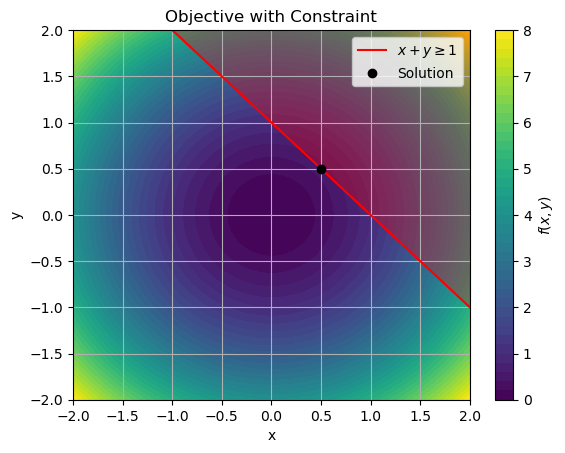

In [6]:
draw_p1()

The point marked "Solution" is where we minimize the function $x^2+y^2$, while maintaining the constraint that $x+y\geq 1$.

# Problem 2

Where is a plane closest to some particular point?

Define the plane. Define the point.

Fancy words: Given a point $\bm{z} \in \mathbb{R}^n$ and a hyperplane $\bm{w}^\intercal\bm{x}+v=0$, find the projection of the point $\bm{z}$ onto the hyperplane.

We'll discuss it and implement an abstract solution (though the demo is 3D by necessity).

I want to find the coordinates for $x$, such that the distance between $x$ and $z$ is minimized. That is,

$$
\begin{equation*}
\begin{aligned}
\min_{x} \quad & \tfrac{1}{2}||\bm{x} - \bm{z}||^2_2 \\
\text{s.t.} \quad  & \bm{w}^\intercal \bm{x} + v = 0 \\
\end{aligned}
\end{equation*}
$$

And, to be very clear: only the coordinates of $\bm{x}$ are variables; the rest are defined values for the problem. We'll talk a bit more about the objective function below...

### Lagrange multipliers

My intention was to do this on the board. I may follow up and do this.

### CVXOPT

First, we have to get this into standard form:

$$
\begin{array}{ccc}
\begin{aligned}
\min_{x} \quad & \tfrac{1}{2}\|\mathbf{x} - \mathbf{z}\|_2^2 \\
\text{s.t.}\quad & \mathbf{w}^\top \mathbf{x} + v = 0
\end{aligned}
&
\qquad \rightarrow \qquad
&
\begin{aligned}
\min_{\theta} \quad & \tfrac{1}{2}\theta^\top P \theta + q^\top \theta + r \\
\text{s.t.}\quad & G\theta \preceq h \\
& A\theta = b
\end{aligned}
\end{array}
$$

Again, first I handle the decision variables. What's $\theta$?

Simply, $\theta$ will be the coordinates of $\bm{x}$. I'll just use $\bm{x}$ in this problem, and hope it won't lead to confusion.

Next, what are the constraints?

There are no inequality constraints, so there's no $G$ or $h$ matrices.

There is an equality constraint. We have to do a tiny bit of re-arranging; CVXOPT wants all constant terms on the other side of the sign, so
$$
\mathbf{w}^\top \mathbf{x} + v = 0 \quad \rightarrow \quad \mathbf{w}^\top \mathbf{x} = -v
$$

Now, trivially, $b=-v$ and $A=\mathbf{w}^\intercal$.

Now for the objective function: $\tfrac{1}{2}||\mathbf{x} - \mathbf{z}||_2^2$

This seems a bit odd. It's not *just* the distance function; it's half the distance function, squared. However, consider it for a moment. Both the one-half and the squaring preserve where the minimum occurs. <small><small>What's more, it works as a math problem with this interpretation and would likely be a pain without it.</small></small>

This distance is equivalent to the dot product of $\mathbf{x} - \mathbf{z}$ with itself:
$$
\begin{align*}
    \tfrac{1}{2}||\mathbf{x} - \mathbf{z}||_2^2 
        &= \tfrac{1}{2}(\bm{x}-\bm{z})^\intercal(\bm{x}-\bm{z}) \\
        &= \tfrac{1}{2}
            \left(
                \bm{x}^\intercal\bm{x}
                - 2\bm{z}^\intercal\bm{x}
                + \bm{z}^\intercal\bm{z}
            \right) //
        &= \tfrac{1}{2}\bm{x}^\intercal\bm{x} - \bm{z}^\intercal\bm{x} + \tfrac{1}{2}\bm{z}^\intercal\bm{z}
\end{align*}
$$

Recalling that $\bm{z}$ is a constant, it's fairly straightforward to see how this fits into CVXOPT's standard form ($\tfrac{1}{2}\theta^\intercal P \theta + q^\intercal \theta +r$).

We have $P = I$, $q=\bm{z}^\intercal$, and $r$... doesn't matter. It's a constant and doesn't impact the optimization.

We can now plug in our values: $P = I$, $q=2\bm{z}^\intercal$, $A=\mathbf{w}^\intercal$ and $b=-v$.

In [7]:
def do_p2(w, v, z):
  # Convert from equations of hyperplane and point to standard form
  P = np.eye(z.shape[0])  # Objective quadratic terms
  q = (-z).reshape(-1,1)  # Objective linear terms (as a COLUMN vector)
  A = w                   # Equality constraint
  b = np.array(-v)        # Equality constraint

  # Rearrange for use with CVXOPT
  P, q, A, b = [np.atleast_2d(x) for x in [P, q, A, b]]
  P, q, A, b = [x.astype(float) for x in [P, q, A, b]]  
  P, q, A, b = [cvxopt.matrix(M) for M in [P, q, A, b]]

  # # Rearrange for use with CVXOPT
  # P, q, A, b = [
  #   cvxopt.matrix(
  #     np.atleast_2d(
  #       M.astype(float)
  #       )
  #     ) 
  #     for M in [P, q, A, b]]

  # Actually use CVXOPT
  sol = cvxopt.solvers.qp(P, q, A=A, b=b)
  x = np.array(sol['x']).flatten()
  return x


w = np.array([5, 2.5, 5])
b = -0.5
z = np.array([1, 1, 1.])

print(do_p2(w, b, z))

[-0.06666667  0.46666667 -0.06666667]


I don't know which form is more clear for the conversion.

### Visualize

This time, I'll use Plotly for an interactive 3D figure. To install it: `conda install -c conda-forge plotly`

In [8]:
import plotly.express as px
import plotly.graph_objects as go

In [9]:
def plot_figure(w, v, z):
    # Solve QP problem to find x, the projection of z onto the plane
    x = do_p2(w, v, z)

    # Validate if x lies on the plane
    assert np.isclose(np.dot(w, x) + v, 0), "x is not on the plane"

    # Create the plot
    fig = go.Figure()

    # Plot points
    fig.add_trace(go.Scatter3d(x=[z[0]], y=[z[1]], z=[z[2]], mode='markers', name='Point z'))
    fig.add_trace(go.Scatter3d(x=[x[0]], y=[x[1]], z=[x[2]], mode='markers', name='Projection x'))

    # Determine the plane
    xx, yy = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-2, 2, 50))
    zz = (-w[0] * xx - w[1] * yy - v) / w[2]

    # Plot the plane
    fig.add_trace(go.Surface(z=zz, x=xx, y=yy, opacity=0.5, name='Plane'))

    # Customize layout
    fig.update_layout(scene=dict(xaxis_title='X',
                                 yaxis_title='Y',
                                 zaxis_title='Z',
                                 xaxis=dict(range=[-2, 2]),
                                 yaxis=dict(range=[-2, 2]),
                                 zaxis=dict(range=[-2, 2]),
                                 aspectmode='cube'),
                      margin=dict(l=0, r=0, b=0, t=0))

    fig.show()

In [10]:
# Parameters (Note that I've included some alternatives, it works for any of these values of z, w, b)
# z = np.array([0, 0, 1])
z = np.array([1, 1, 1])

# w = np.array([0, 0, 1])
# w = np.array([1, 1, 1])
w = np.array([5, 2.5, 5])

b = 0.5
# b = 0  # If the point is on the plane, it may not be easy to see both points (they overlap)

plot_figure(w, b, z)

# Problem 3

We know that linear regression can be expressed as an optimization problem (from Recitation 1):

$$\min_{a,b}\frac{1}{M}\sum_m (ax^{(m)} + b - y^{(m)})^2$$

How can we solve this with these new methods?

### Preliminary

First, I'll reload the data, and check that things look right. This is ***ALWAYS*** the right first step, even when I think I know what's going on. It's caught numerous issues.

In [11]:
from pathlib import Path
DATA_PATH = "automobile/imports-85.data"
Path(DATA_PATH).exists()

True

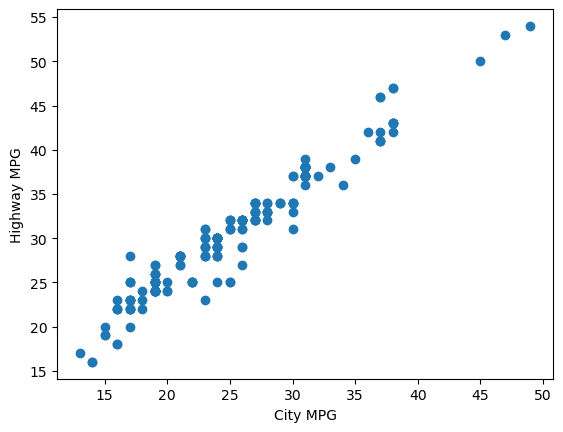

In [12]:
import pandas as pd
df = pd.read_csv(DATA_PATH, header=None, na_values='?')
data = df.iloc[:, [16, 23, 24, 25]]
data.columns = ["wt", "city-mpg", "hwy-mpg", "price"]  # Oops! Apparently I gave the wrong name to the engine size, calling it "wt"
x_label = "city-mpg"
y_label = "hwy-mpg"
x = data[x_label]
y = data[y_label]
plt.scatter(x, y)
plt.ylabel("Highway MPG")
plt.xlabel("City MPG");

We want the best model, with the best values for $a$ and $b$. This happens when we minimize the loss function $$\min_{a,b}\frac{1}{M}\sum_m (ax^{(m)} + b - y^{(m)})^2$$

### Lagrange multipliers?

Nah. There's no constraints. But there is an analytical solution. We could do it... but didn't in recitation "because of time" (<small><small>because Jim tried and got tangled up in algebra and would have just confused everyone</small></small>).

### CVXOPT

I didn't go over this in detail in the recitation. I simply showed the results and said "Hey! Look! It's possible.Let me know if you'd like and I can provide derivation.

In [13]:
P = np.array([[np.dot(x, x), np.sum(x)], [np.sum(x), len(x)]])
P = cvxopt.matrix(P, tc='d')
q = -np.array([np.dot(x, y), np.sum(y)])
q = cvxopt.matrix(q, tc='d')
sol = cvxopt.solvers.qp(P, q)

a, b = np.array(sol['x']).flatten()
a, b

(np.float64(1.0224568127472213), np.float64(4.965357454131052))

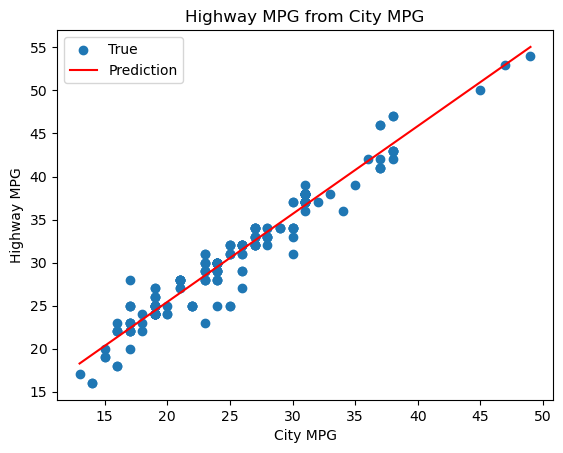

In [15]:
pred_x = np.linspace(x.min(), x.max(), 10)
pred_y = a * pred_x + b

plt.scatter(data[x_label], data[y_label], label="True")
plt.plot(pred_x, pred_y, color='red', label="Prediction")
plt.ylabel("Highway MPG")
plt.xlabel("City MPG")
plt.legend()
plt.title("Highway MPG from City MPG");

Compare this solution to the one obtained with gradient descent in the other notebook.

<details>
<summary>Short version</summary>
This CVXOPT solver gets to "good" answers much more quickly than my janky solution.
</details>

<details>
<summary>Long version</summary>

Here, we get $(1.0224568127472213, 4.965357454131052)$; while there we got ($1.\underline{1\dots}, 2.\underline{1\dots}$). I've underlined the differences, so you can get a quick sense of what's changed.

Why the difference? Hyperparameters! In that notebook, we used:
- $\gamma = 2\times 10^{-4}$, 
- $N_\mathrm{iters}=2000$, 
- $(a_0, b_0) = (2.0\dots, 2.0\dots)$,

However, I just went back and toyed with it some more. When I change hyperparameters to give it a better start:
- $\gamma = 1\times 10^{-3}$, 
- $N_\mathrm{iters}=1,000$, 
- $(a_0, b_0) = (1.0\dots, 5.0\dots)$,
- I get accuracy to more digits: ($1.02\underline{1295200535841}, 4.9\underline{96611597186609}$)

I can run it longer (~1 second):
- $\gamma = 1\times 10^{-3}$, 
- $N_\mathrm{iters}=10,000$, 
- $(a_0, b_0) = (1.0\dots, 5.0\dots)$,
- Output: ($1.022\underline{0809043196402}, 4.9\underline{7547158314615}$)

Or even longer (~10 seconds):
- $\gamma = 1\times 10^{-3}$, 
- $N_\mathrm{iters}=100,000$, 
- $(a_0, b_0) = (1.0\dots, 5.0\dots)$,
- Output: ($1.0224568\underline{080125394}, 4.965357\underline{581521612}$)

We see that getting the number of iterations and the learning rate balanced can really help the accuracy. The learning rate can only go so high: in this case, we saw $2\times 10^{-3}$ would cause it to overshoot.

</details>

# Backup

### Single variable problem, known to work with method of Lagrange multipliers

$$
\begin{equation*}
\begin{aligned}
\min_{x} \quad & \frac{1}{2} (x-1)^2 \\
\text{s.t.} \quad  & x \geq 2 \\
\end{aligned}
\end{equation*}
$$

### Single variable problem, with trickiness

$$
\begin{equation*}
\begin{aligned}
\min_{x} \quad & \frac{1}{2} x^2 + 6 \\
\text{s.t.} \quad  & x \geq 0 \\
                   & x \leq 5 \\
\end{aligned}
\end{equation*}
$$

Yes, it's a trivial problem. However, working it with the method of Lagrange multipliers is *really* instructive. Or it was for me.

<details>
<summary>Hint</summary>
Check at the boundaries of the dual. When I naively took gradients, it looked like garbage. But the dual problem is valid where $\lambda_1, \lambda_2 \geq 0$
</details>

Bonus: [Visualization in Desmos](https://www.desmos.com/3d/1zgmx7saep). This helped me understand what's going on, ***after*** working through the problem. I recommend fighting the problem a bit first.